# Run some estimates for computing mean-field integral

Recall

$$P_d^t \approx \int_x\mathcal{N}\left(x; \mu_d, \sigma_d^2 \right) \prod_{d'\neq d} \Phi\left(x; \mu_{d'}, \sigma_{d'}^2 \right)dx$$

where

$$\mu_d = D \sum_{d'} \mu_J(d, d') P_{d'}^{t-1} + u_d^t$$

and

$$\sigma_d^2 = D \sum_{d'} \sigma_J^2(d, d') P_{d'}^{t-1} + v_d^t$$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import sys

from disp import set_plot

cc = np.concatenate


def get_mu(p, u, D, mu_j):
    return D*(mu_j@p) + u

def get_sgm_2(p, v, D, sgm_2_j):
    return D*(sgm_2_j@p) + v

def norm(x, mu, sgm):
    return stats.norm.pdf(x, loc=mu, scale=sgm)

def phi(x, mu, sgm):
    return stats.norm.cdf(x, loc=mu, scale=sgm)

def get_itgnd(x, p, u, v, D, mu_j, sgm_2_j):
    mu = get_mu(p, u, D, mu_j)
    sgm_2 = get_sgm_2(p, v, D, sgm_2_j)
    
    itgnd = np.nan*np.zeros((len(x), D))
    for d in range(D):
        phis = [phi(x, mu[d_], sgm_2[d_]**.5) for d_ in range(D) if d_ != d]
        itgnd[:, d] = norm(x, mu[d], sgm_2[d]**.5)*np.prod(phis, axis=0)
    return itgnd

def get_itgnd_2(x, mu, sgm):
    D = len(mu)
    term_1 = norm(x, mu[0], sgm[0])
    phis = [phi(x, mu[d_], sgm[d_]) for d_ in range(1, D)]
    itgnd = term_1*np.prod(phis, axis=0)
    return itgnd, term_1, phis

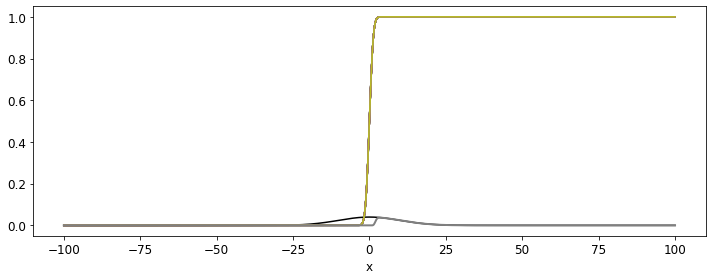

In [2]:
X = np.linspace(-100, 100, 1000)

D = 30
MU = np.zeros(D)
SGM = np.ones(D)
SGM[0] = 10

itgnd, term_1, phis = get_itgnd_2(X, MU, SGM)

fig, ax = plt.subplots(1, 1, figsize=(10, 4), tight_layout=True)
ax.plot(X, term_1, c='k')
ax.plot(X, np.transpose(phis))
ax.plot(X, itgnd, c='gray', lw=2)

set_plot(ax, x_label='x')

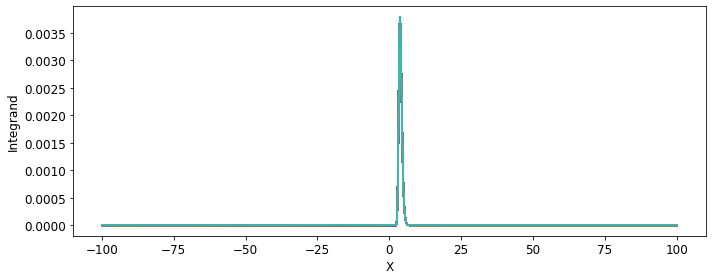

In [5]:
D = 200
MU_J = np.zeros((D, D))
SGM_2_J = np.ones((D, D))*.01

X = np.linspace(-100, 100, 1000)
# P = np.ones(D)/D
P = cc([[.5, .5], np.zeros(D-2)])
# P = np.array([1, 0, 0, 0])
itgnd = get_itgnd(X, P, 0, 0, D, MU_J, SGM_2_J)

fig, ax = plt.subplots(1, 1, figsize=(10, 4), tight_layout=True)
ax.plot(X, itgnd)
set_plot(ax, x_label='X', y_label='Integrand')